In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=0.05, random_state=1)

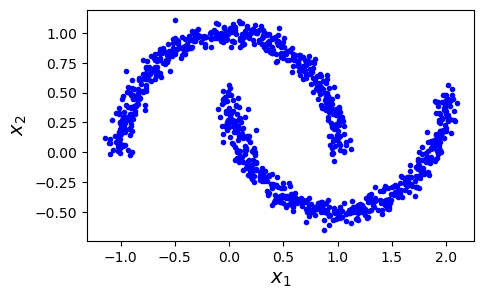

In [3]:
plt.figure(figsize=(5, 3))
plt.plot(x[:,0],x[:,1], 'b.')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

In [4]:
#DBSCAN()

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.07, min_samples=5)
dbscan.fit(x)
dbscan.labels_[:10]

array([ 0,  0,  1,  1,  1,  0,  1,  0, -1,  1])

In [5]:
len(dbscan.core_sample_indices_)

948

In [6]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10])

In [7]:
dbscan.components_[:3]

array([[ 0.06645624,  0.39819469],
       [ 1.40913481, -0.48396229],
       [-0.90597929,  0.21777417]])

In [8]:
#Plot

In [9]:
def plotDbscan(dbscan, x):
    anom = dbscan.labels_ == -1
    plt.scatter(x[~anom, 0], x[~anom, 1], c=dbscan.labels_[~anom], marker='*', s=20)
    plt.scatter(x[anom, 0], x[anom, 1], c='r', marker='x', s=20)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)

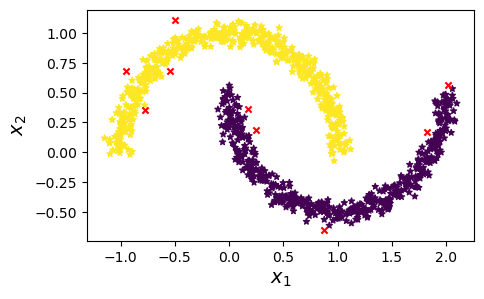

In [10]:
plt.figure(figsize=(5, 3))
plotDbscan(dbscan, x)
plt.show()

In [11]:
#Predict(SVC)

In [12]:
xCore = dbscan.components_
yCore = dbscan.labels_[dbscan.core_sample_indices_]

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svmClf = Pipeline([
    ('scaler', StandardScaler()),
    ('polySvc', SVC(kernel='poly', degree=3, coef0=1, C=10, random_state=1))
])
svmClf.fit(xCore, yCore)

xNew = np.array([[-.5, 1], [1, .5], [0, -.1], [2, 1]])
svmClf.predict(xNew)

array([1, 1, 0, 1])

In [14]:
#Decision Boundary

In [15]:
def plotDecisionBoundary(clf, x, y):
    xmin = x.min(axis=0)
    xmax = x.max(axis=0)
    x1s = np.linspace(xmin[0]-0.2, xmax[0]+0.2, 500)
    x2s = np.linspace(xmin[1]-0.2, xmax[1]+0.2, 500)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = clf.predict(xNew).reshape(x1.shape)
    plt.contourf(x1, x2, yPred, alpha=0.2)
    plt.contour(x1, x2, yPred)

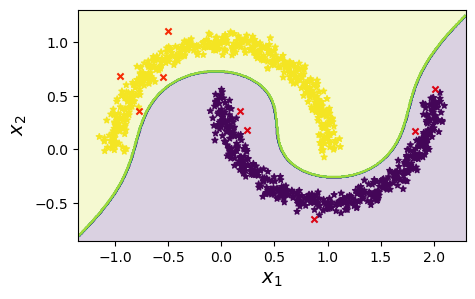

In [16]:
plt.figure(figsize=(5, 3))
plotDbscan(dbscan, x)
plotDecisionBoundary(svmClf, x, y)
plt.show()